# Descrição do projeto

Este projeto visa realizar uma pesquisa de mercado sobre restaurantes em Los Angeles para estudar o potencial de investimento em uma pequena cafeteria com garçons robôs como diferencial. Ao final da análise, uma apresentação foi preparada para demonstrar as análises e conclusões aos investidores.

### Importando as bibliotecas

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

### Importando a tabela

In [99]:
# Salvando na variavel
df_restaurant = pd.read_csv('rest_data_us_upd.csv', sep=',', dtype={'chain':'category', 'object_type':'category'})

#### 1- Processando os dados

In [100]:
# Visualizando o conjunto de dados
print(df_restaurant.head())
print(df_restaurant.info())

      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   category
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: categor

In [101]:
# Removendo possíveis duplicados
df_restaurant = df_restaurant.drop_duplicates()
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   category
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(2), int64(2), object(2)
memory usage: 320.8+ KB


In [165]:
# Visualizando as linhas sem dados
no_chain = df_restaurant[df_restaurant['chain'].isna()]
no_chain

,id,object_name,address,chain,object_type,number,rede,street,qtd_estab_rua
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14,TAQUERIA LOS CARNALES,E WHITTIER BLVD,60
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1,JAMMIN JIMMYS PIZZA,FIRESTONE BLVD,11
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35,THE LEXINGTON THEATER,E RD ST,28


In [104]:
# Visualizando possíveis id duplicados
repetidos = df_restaurant.groupby('id')[['object_name']].nunique()
repetidos[repetidos['object_name'] > 1]

,object_name
id,


In [105]:
# Função para padronizar os nomes
def limpar_nome(nome):
    # Remover números e caracteres especiais
    nome_limpo = re.sub(r'[^a-zA-Z\s]','', nome).strip().upper()
    return nome_limpo

# Criando nova coluna de nomes padronizados
df_restaurant['rede'] = df_restaurant['object_name'].apply(limpar_nome)

df_restaurant

,id,object_name,address,chain,object_type,number,rede
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT COFFEE SHOP
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,REILLYS
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,STREET CHURROS
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,HALL OF JUSTICE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,FINMELROSE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,JUICY WINGZ
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,MEDIDATE COFFEE


Nesta primeira parte, os tipos dos dados foram corrigidos e as colunas foram verificadas para analisar possível dados faltantes ou dados repetidos. O que foi constatado é que, em relação aos dados faltantes, não encontramos formas de preenchê-los, mas não vão impactar a nossa análise. Além disso, o dataframe não contém dados repetidos.

Em relação a coluna 'object_name' vimos que os dados dos restaurantes de rede podem estar diferentes mesmo fazendo parte da mesma rede, sendo assim, padronizamos os dados para que possamos agrupar corretamente em análises posteriores.

#### 2 Análise de dados

##### 2.1 Proporções dos vários tipos de estabelecimentos

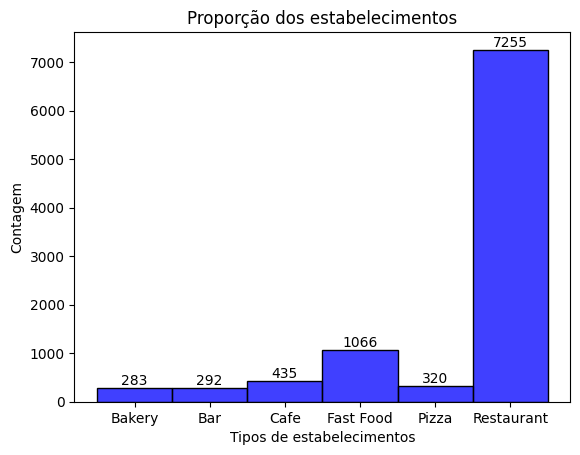

In [106]:
# Criando o histograma
ax = sns.histplot(x='object_type', data=df_restaurant, color='blue')

# Adicionando rótulos de contagem em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

# Ajustando os titulos
plt.title('Proporção dos estabelecimentos')
plt.xlabel('Tipos de estabelecimentos')
plt.ylabel('Contagem')

plt.show()

Em relação aos tipos de restaurantes, vemos que nos dados gerais as cafeterias ocupam a terceira colocação no que diz respeito quantidade de restaurantes.

##### 2.2 Proporções de estabelecimentos de rede e não

In [139]:
# Definindo a cor do gráfico
paleta_cores = px.colors.qualitative.Pastel

#Plotando um gráfico de pizza
fig = px.pie(names=df_restaurant['chain']
       .value_counts()
       .index,
         values=df_restaurant['chain']
         .value_counts().values, title='Proporção entre os estabelecimentos',color_discrete_sequence=paleta_cores)
fig.update_traces(textinfo='percent')

# Centraliza o título horizontalmente
fig.update_layout(title_x=0.5)
fig.show()

Ao analisar a proporção dos restaurantes de rede, vemos que os estabelecimentos independentes são maioria na cidade.

In [153]:
# Definindo a cor do gráfico
paleta_cores = px.colors.qualitative.Pastel

#Plotando um gráfico de pizza
fig = px.pie(names=['Cafeterias de rede','Cafeterias independentes'],
         values=df_restaurant['chain']
         .value_counts().values, title='Proporção entre as cafeterias',color_discrete_sequence=paleta_cores)
fig.update_traces(textinfo='percent')

# Centraliza o título horizontalmente
fig.update_layout(title_x=0.5)  
fig.show()

##### 2.2.2 Qual tipo de estabelecimento é típico para redes?

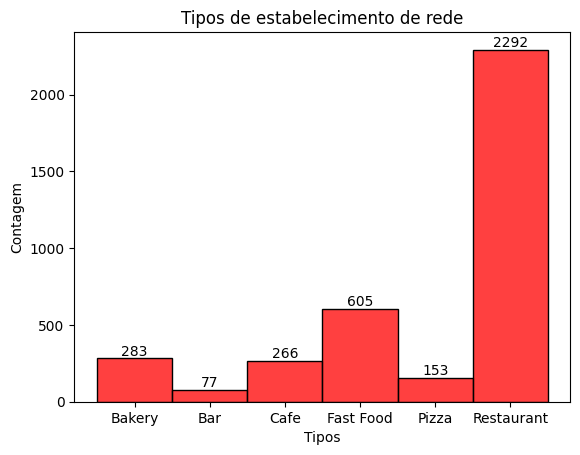

In [108]:
# Filtrando os dados para redes
df_chain = df_restaurant[df_restaurant['chain'] == 'True']

# Criando o histograma
ax = sns.histplot(x='object_type', data=df_chain, color='red')

# Adicionando rótulos de contagem em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

# Definindo os títulos
plt.title('Tipos de estabelecimento de rede')
plt.xlabel('Tipos')
plt.ylabel('Contagem')

plt.show()

Novamente podemos observar a divisão por tipo de restaurante, mas agora apenas aqueles pertencentes a redes. Mais uma vez o padrão da ordem de quantidades dos restaurantes se manteve, com exceção das Bakery's, que têm uma maior concentração de estabelecimentos pertencentes a redes.

##### 2.3 O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?

##### 2.3.1 Número de assentos

In [109]:
# Filtra os restaurantes de rede
df_rede = df_restaurant[df_restaurant['chain'] == 'True'].copy()

# Filtra os estabelecimentos não rede
df_not_rede = df_restaurant[df_restaurant['chain'] == "False"].copy()

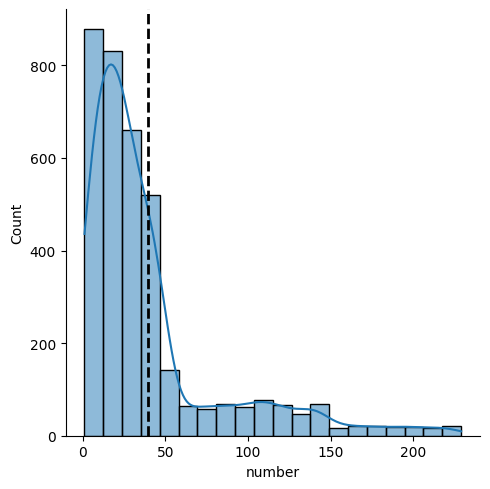

In [110]:
# Plotando o gráfico de histograma
sns.displot(data=df_rede['number'], bins=20, kde=True)
plt.axvline(x=df_rede['number'].mean(), color='black', linestyle='--', linewidth=2)
plt.show()


In [111]:
# Média de assentos por rede
print(df_rede['number'].mean())

# Mediana da quantidade de assentos das unidades
print(df_rede['number'].median())

39.69423286180631
25.0


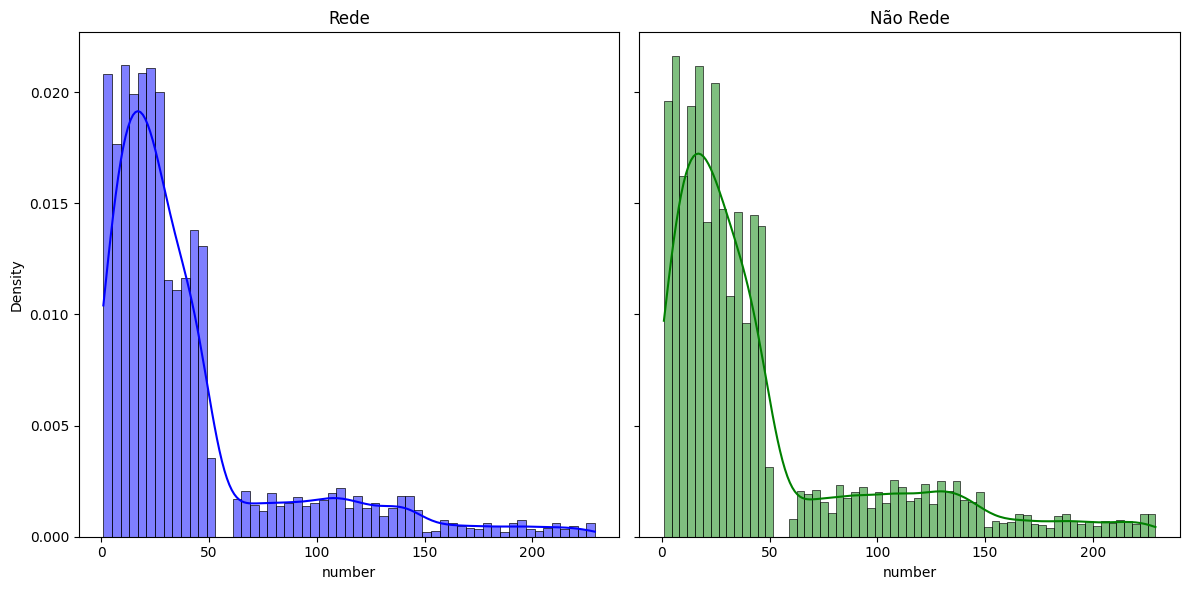

In [112]:
# Cria a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plota os histogramas de quantidade de assentos
sns.histplot(data=df_rede, x='number', ax=axes[0], kde=True, stat="density", color='blue')
axes[0].set_title('Rede')

sns.histplot(data=df_not_rede, x='number', ax=axes[1], kde=True, stat="density", color='green')
axes[1].set_title('Não Rede')

# Ajusta o layout
plt.tight_layout()

# Exibe os subplots
plt.show()

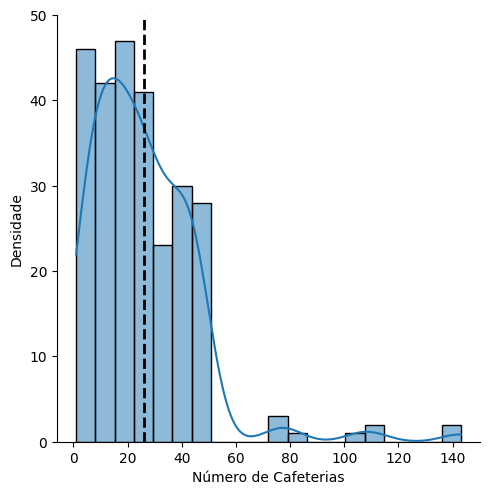

25.917293233082706


In [161]:
# Plotando o gráfico de histograma
sns.displot(data=df_rede[df_rede['object_type']=='Cafe']['number'], bins=20, kde=True)
plt.axvline(x=df_rede[df_rede['object_type']=='Cafe']['number'].mean(), color='black', linestyle='--', linewidth=2)

# Ajustando os parâmetros do gráfico
plt.xlabel('Número de Cafeterias')  
plt.ylabel('Densidade')
plt.ylim(0,50)
plt.show()

print(df_rede[df_rede['object_type']=='Cafe']['number'].mean())

Em relação ao número de assentos, temos que os estabelecimentos de rede possem em média 40 assentos, aproximadamente. Olhando mais especificamente as cafeterias, a quantidade média de assentos fica próxima dos 26 por cafeteria.

##### 2.3.2 Número de estabelecimentos

In [114]:
# Agrupa os estabelecimentos de rede
estabelecimentos = (df_rede.groupby('rede',as_index=False)
                    ['number'].count()                
                    .sort_values(by='number',ascending=False)
                    .rename(columns={'number': 'qtd_estab'})
)

print(estabelecimentos['qtd_estab'].mean())
print(estabelecimentos['qtd_estab'].median())

1.7922964407606046
1.0


<Axes: xlabel='qtd_estab', ylabel='Count'>

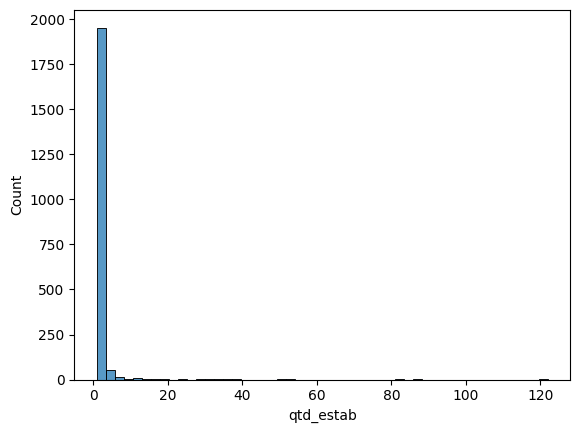

In [115]:
# Plota um histograma
sns.histplot(data=estabelecimentos['qtd_estab'],bins=50)

In [116]:
# Cria df contendo apenas as informações da rede e do tipo de estabelecimento
df_tipos_rede = df_rede[['rede','object_type']].copy().drop_duplicates()

estabelecimentos = estabelecimentos.merge(df_tipos_rede, how='left', on='rede')
estabelecimentos

,rede,qtd_estab,object_type
0,SUBWAY,122,Fast Food
1,STARBUCKS COFFEE,87,Cafe
2,MCDONALDS,82,Fast Food
3,MCDONALDS,82,Restaurant
4,JACK IN THE BOX,53,Restaurant
...,...,...,...
2049,IVANS RESTAURANT,1,Restaurant
2050,ITS THAI HOME RESTAURANT,1,Restaurant
2051,ISAAN STATION THAI ST FOOD,1,Restaurant
2052,ISA JAPANESE RESTAURANTRAMEN SUSHI CURRY,1,Restaurant


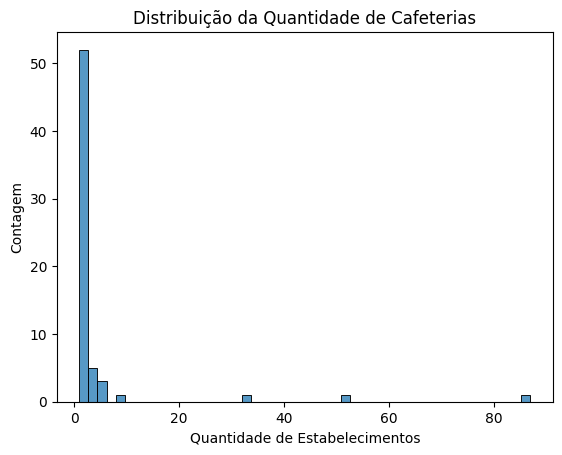

In [164]:
# Plota um histograma
sns.histplot(data=estabelecimentos[estabelecimentos['object_type']=='Cafe']['qtd_estab'],bins=50)
plt.xlabel('Quantidade de Estabelecimentos')  # Renomeando o eixo x
plt.ylabel('Contagem')  # Rótulo do eixo y (contagem de ocorrências)
plt.title('Distribuição da Quantidade de Cafeterias')  # Título do gráfico
plt.show()

In [118]:
# Calculando a média de estabelecimentos das redes de cafeteria
print(estabelecimentos[estabelecimentos['object_type']=='Cafe']['qtd_estab'].mean())

# Calculando a mediana de estabelecimentos das redes de cafeteria
print(estabelecimentos[estabelecimentos['object_type']=='Cafe']['qtd_estab'].median())

4.25
1.0


(0.0, 30.0)

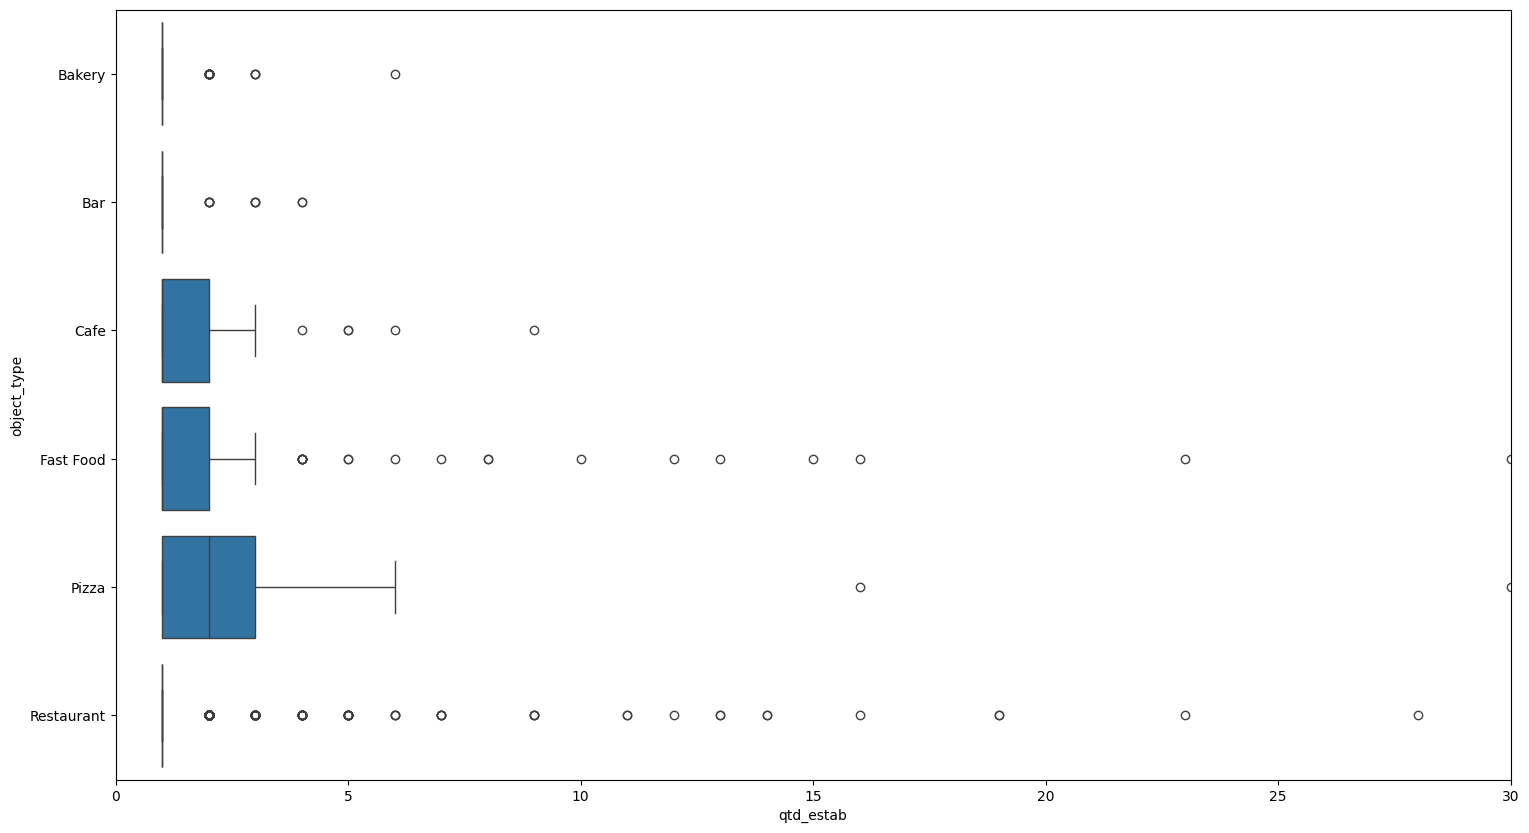

In [119]:
# Plota os boxplot
plt.figure(figsize=(18,10))
sns.boxplot(x='qtd_estab', y='object_type', data=estabelecimentos, orient='h')

plt.xlim(0,30)

##### Redes no geral
Com base nos gráficos, podemos caracterizar os estabelecimentos de rede como tendo, em geral, poucas unidades uma vez que apesar de ter alguns casos de redes com muitas unidades a média de unidades por rede é aproximadamente 1,8 e a mediana é de apenas 1, mas avaliando por tipo de estabelecimento fica mais claro que isso depende, uma vez que os fast-food, pizza e café possuem mais unidades.  
Além disso, os estabelecimentos de rede também são caracterizados por terem poucos lugares, sua média é de quase 40 assentos por unidade.  

##### Cafeterias
No caso das cafeterias, temos algumas diferenças: as cafeterias de rede têm uma média de mais de 4 estabelecimentos por rede, o valor foi impactado por conta de algumas redes com grandes quantidades de estabelecimentos como o starbucks por exemplo, e a mediana se manteve sendo 1. E em relação ao número de assentos, o valor médio ficou em torno de 26.

##### 2.4 Avaliando as cafeterias que não pertencem à redes

##### 2.4.1 Número de assentos

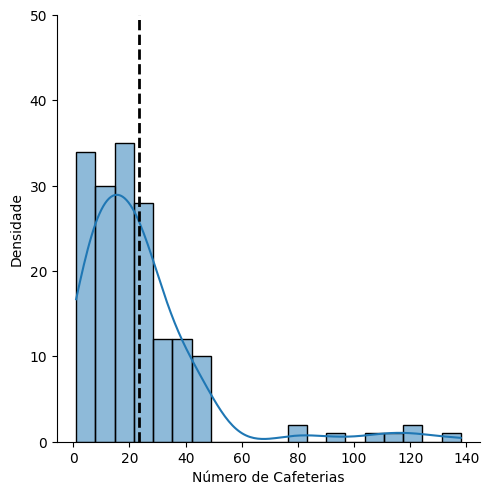

In [162]:
# Histograma da quantidade de assentos
sns.displot(data=df_not_rede[df_not_rede['object_type']=='Cafe']['number'], bins=20, kde=True)
plt.axvline(x=df_not_rede[df_not_rede['object_type']=='Cafe']['number'].mean(), color='black', linestyle='--', linewidth=2)
plt.xlabel('Número de Cafeterias')  # Renomeando o eixo x
plt.ylabel('Densidade')  # Adicionando um rótulo para o eixo y (no caso do kde=True)
plt.ylim(0,50)
plt.show()

In [137]:
# Média de assentos
print(df_not_rede[df_not_rede['object_type']=='Cafe']['number'].mean())

# Mediana da quantidade de assentos
print(df_not_rede[df_not_rede['object_type']=='Cafe']['number'].median())

23.556213017751478
19.0


##### 2.5 Número médio de assentos para cada tipo de estabelecimento

In [120]:
# Definindo as médias por tipo de restaurante
medias = df_restaurant.groupby('object_type', observed=False,as_index=False)['number'].mean().rename(columns={'number':'media'})
medias

,object_type,media
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.459375
5,Restaurant,48.042316


In [121]:
# Plotando o gráfico de barras
px.bar(medias, x='object_type', y='media', color='object_type')

c:\Users\joaoq\anaconda3\envs\myenv\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\joaoq\anaconda3\envs\myenv\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: xlabel='object_type', ylabel='number'>

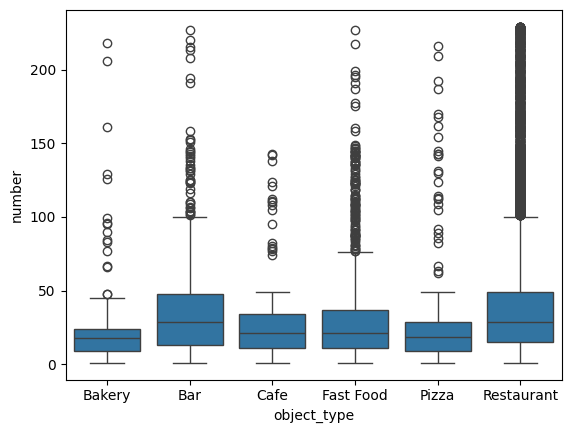

In [122]:
# Plotando os gráficos de caixa
sns.boxplot(x='object_type',y= 'number', data=df_restaurant)

Aqui vemos novamente as distribuições de assentos em diferentes gráficos. Os tipos de estabelecimento com o maior número de assentos são os restaurantes e bares. Os estabelecimentos de Café têm a segunda menor média (25).

##### 2.6 Avaliando os restaurantes por endereço

In [123]:
# Criando a coluna dos nomes das ruas
df_restaurant['street'] = df_restaurant['address'].apply(limpar_nome)
df_restaurant

,id,object_name,address,chain,object_type,number,rede,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT COFFEE SHOP,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,REILLYS,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN,ECHO PARK AVE
...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,HALL OF JUSTICE,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,FINMELROSE,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,JUICY WINGZ,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,MEDIDATE COFFEE,S SPRING ST STE


In [124]:
# Define as 10 ruas com mais restaurantes
top_ruas = (df_restaurant.groupby('street',as_index=False)['id']
            .nunique()
            .sort_values('id',ascending=False)
            .rename(columns={'id':'qtd_estab_rua'})
            )

top_ruas.head(10)

,street,qtd_estab_rua
1327,W TH ST,390
1303,W SUNSET BLVD,315
1259,W PICO BLVD,308
1410,WILSHIRE BLVD,226
310,HOLLYWOOD BLVD,198
1000,S WESTERN AVE,193
1041,SANTA MONICA BLVD,192
1271,W RD ST,185
768,S FIGUEROA ST,174
979,S VERMONT AVE,172


In [126]:
# Definindo a paleta de cores do gráfico
paleta_cores = px.colors.qualitative.Pastel

fig = px.bar(top_ruas.head(10),
        x='street',
        y='qtd_estab_rua',
        color='street',
        title='As 10 ruas com mais estabelecimentos',
        labels={'street': 'Rua', 'qtd_estab_rua': 'Quantidade de Estabelecimentos'},
        text='qtd_estab_rua',
        color_discrete_sequence= paleta_cores
            )

# Centraliza o título horizontalmente
fig.update_layout(
    title_x=0.5  
)

fig.show()

c:\Users\joaoq\anaconda3\envs\myenv\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



##### 2.6.1 Ruas com apenas um restaurante

In [127]:
# Conta as ruas com apenas um restaurante
print('Existem {} ruas com apenas um restaurante'.format(top_ruas[top_ruas['qtd_estab_rua'] == 1]['street'].count()))

Existem 873 ruas com apenas um restaurante


In [128]:
# Filtra o dataframe
top_ruas['unicas'] = top_ruas['qtd_estab_rua'] == 1

# Cria gráfico de pizza
total_ruas = top_ruas.shape[0]  # Total de estabelecimentos
ruas_unicas = top_ruas[top_ruas['unicas'] == True].shape[0]  # Ruas com apenas um estabelecimento
ruas_com_mais_de_um = total_ruas - ruas_unicas  # Ruas com mais de um estabelecimento

# Preparar os dados para o gráfico
proporcoes = [ruas_unicas, ruas_com_mais_de_um]
categorias = ['Ruas com um estab', 'Ruas com vários estab']


# Criar o gráfico de pizza
fig = px.pie(names=categorias, values=proporcoes, title='Proporção de Ruas com Apenas um Estabelecimento',color_discrete_sequence=paleta_cores)
fig.update_traces(textinfo='percent')
fig.update_layout(title_x=0.5)  # Centraliza o título horizontalmente
fig.show()

Aqui verificamos uma maioria de ruas que contém apenas um estabelecimento em relação a outras ruas com mais de um estabelecimento.

##### 2.7 Tendência do número de assentos de ruas com vários estabelecimentos

In [129]:
# Adiciona a coluna 
df_restaurant = df_restaurant.merge(top_ruas, on='street', how='left').drop(['unicas'],axis=1)
df_restaurant

,id,object_name,address,chain,object_type,number,rede,street,qtd_estab_rua
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,HABITAT COFFEE SHOP,N EAGLE ROCK BLVD,3
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,REILLYS,WORLD WAY,80
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,STREET CHURROS,HOLLYWOOD BLVD,198
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,TRINITI ECHO PARK,W SUNSET BLVD,315
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,POLLEN,ECHO PARK AVE,12
...,...,...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,HALL OF JUSTICE,W TEMPLE AVE,1
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,FINMELROSE,MELROSE AVE,140
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,JUICY WINGZ,HOLLYWOOD BLVD,198
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,MEDIDATE COFFEE,S SPRING ST STE,15


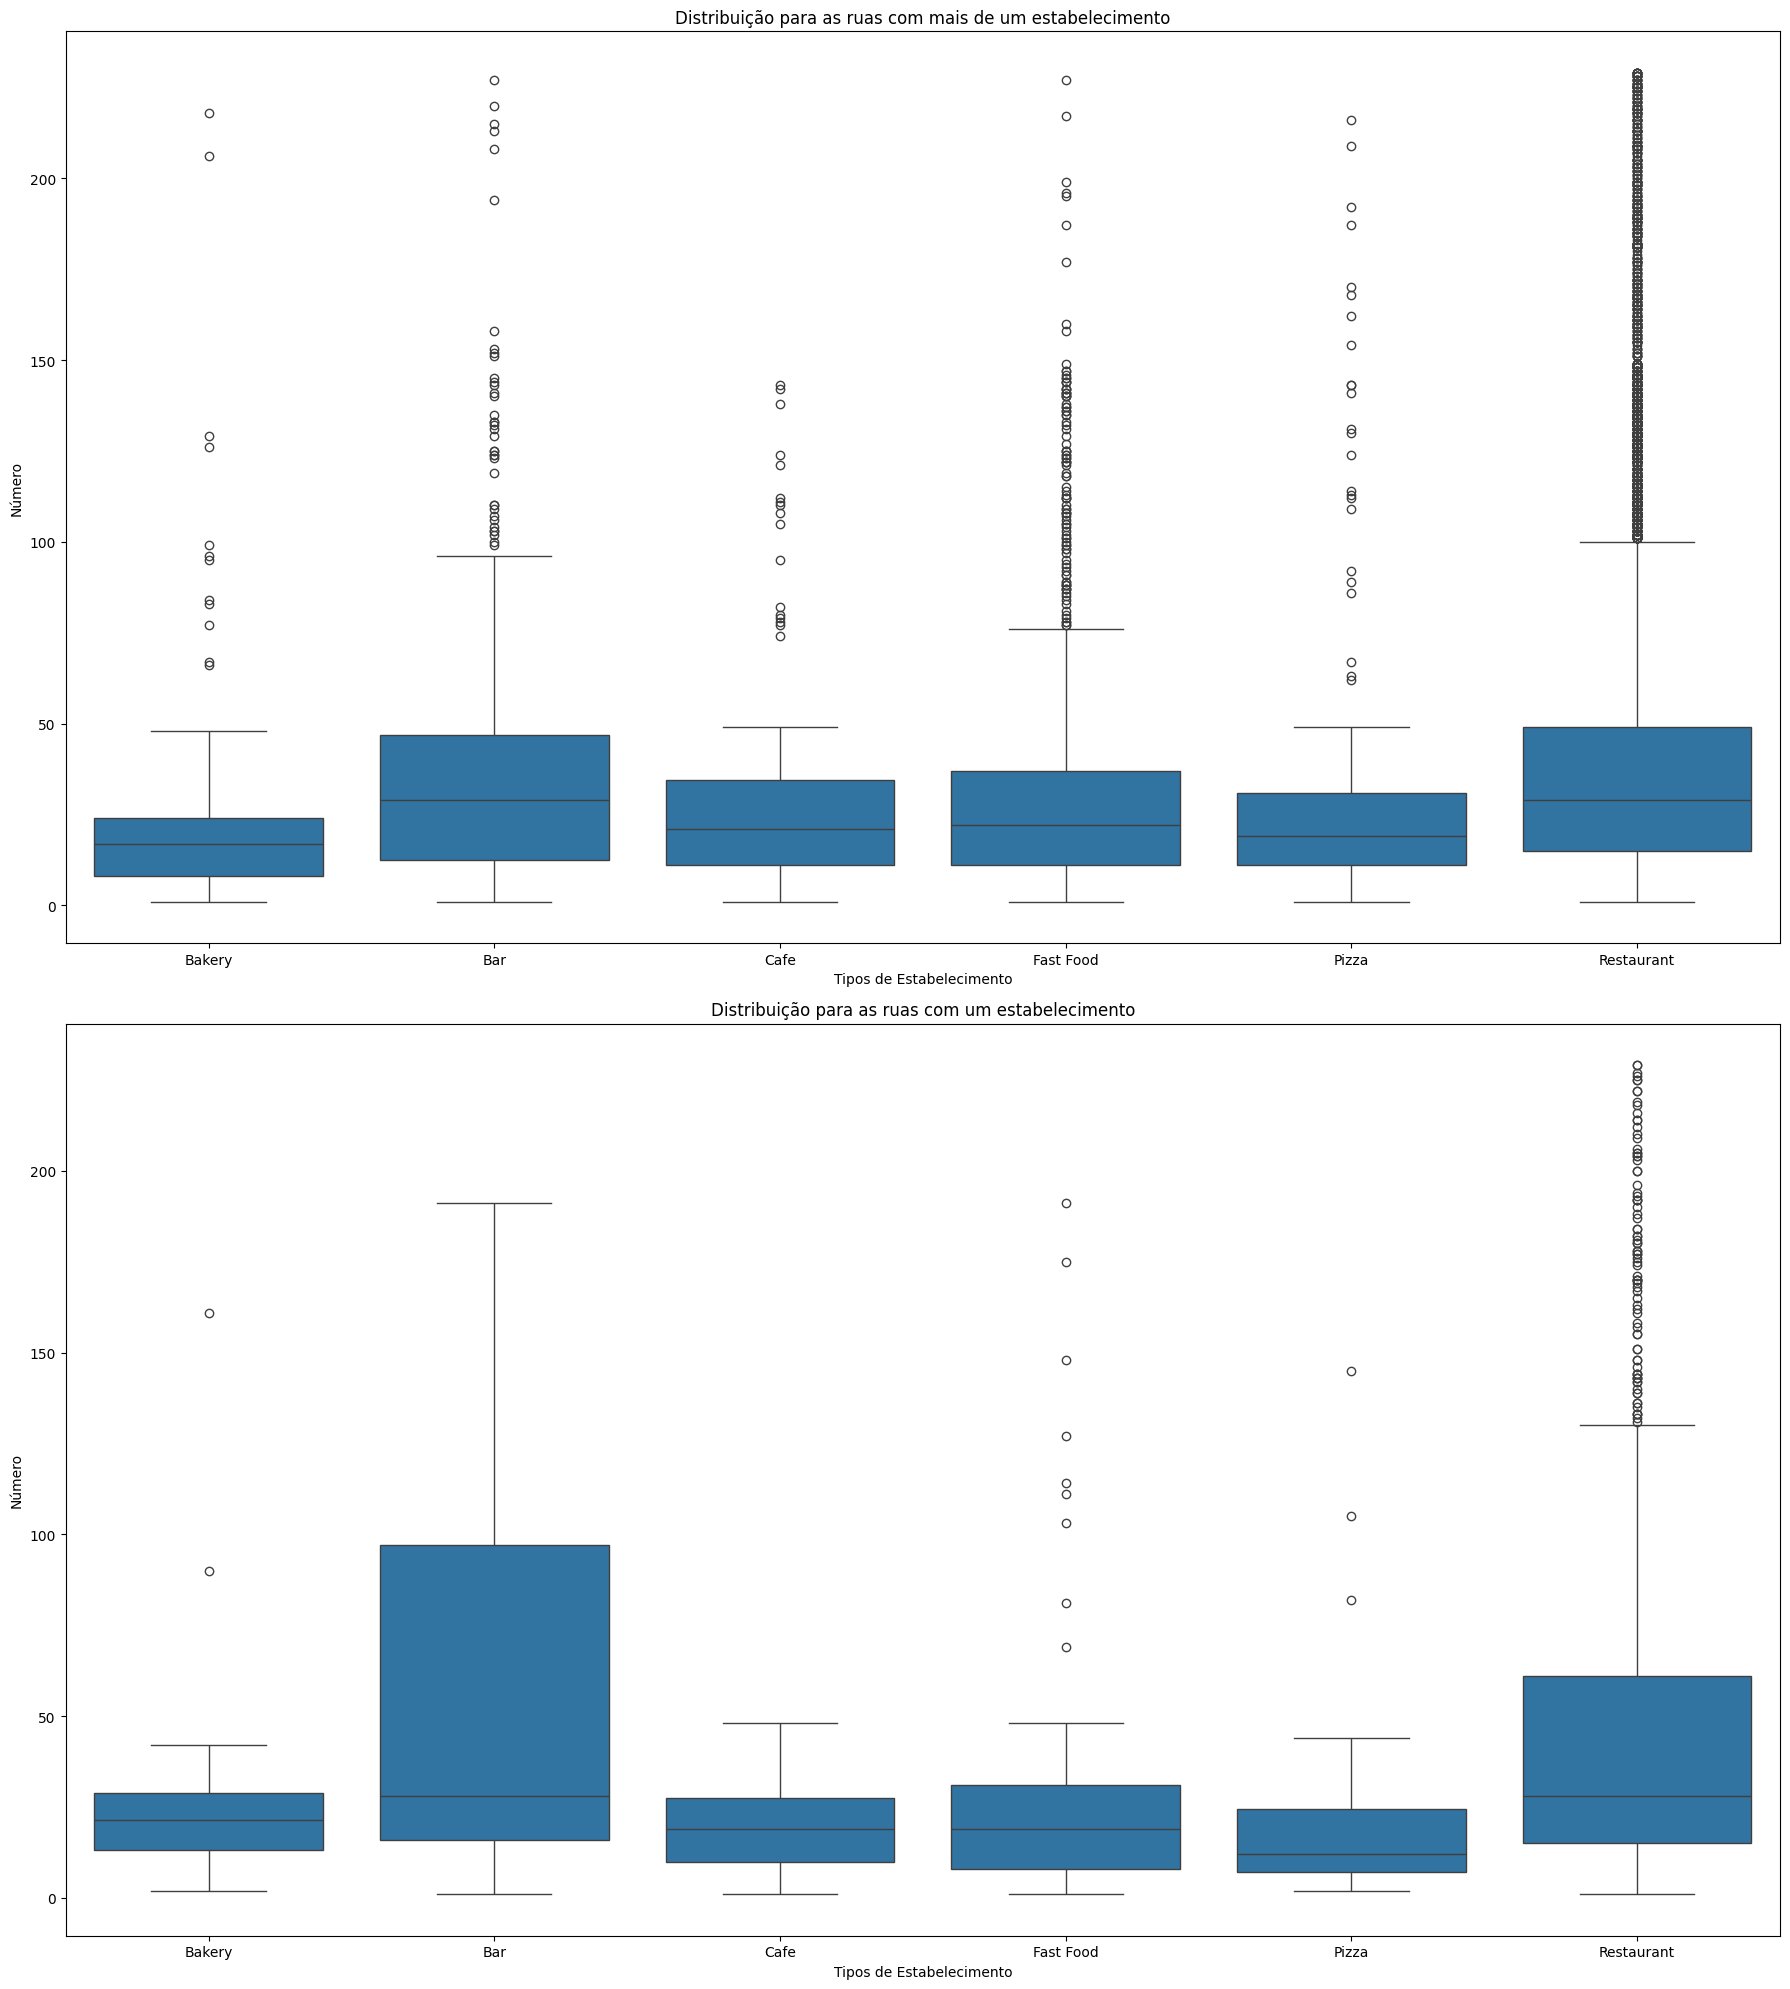

In [166]:
# Definindo as subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 20))  # Defina o tamanho da figura de acordo com suas necessidades

# Filtrando as ruas por quantidade de estabelecimentos
ruas_com_mais_de_um = df_restaurant[df_restaurant['qtd_estab_rua'] != 1]
ruas_com_um = df_restaurant[df_restaurant['qtd_estab_rua'] == 1]

# Distribuição para as ruas cheias (subplot 1)
sns.boxplot(x='object_type', y='number', data=ruas_com_mais_de_um, ax=axes[0])
axes[0].set_title('Distribuição para as ruas com mais de um estabelecimento')
axes[0].set_xlabel('Tipos de Estabelecimento')
axes[0].set_ylabel('Número')

# Distribuição para as ruas menos cheias (subplot 2)
sns.boxplot(x='object_type', y='number', data=ruas_com_um, ax=axes[1])
axes[1].set_title('Distribuição para as ruas com um estabelecimento')
axes[1].set_xlabel('Tipos de Estabelecimento')
axes[1].set_ylabel('Número')

# Ajustar layout e mostrar o plot
plt.tight_layout()
plt.show()



In [144]:
# Printa a média e mediana da quantidade de assentos
print(ruas_com_mais_de_um[ruas_com_mais_de_um['object_type']=='Cafe']['number'].mean())
print(ruas_com_mais_de_um[ruas_com_mais_de_um['object_type']=='Cafe']['number'].median())

25.49616368286445
21.0


No gráfico acima, fica mais claro que a quantidade de estabelecimentos tem um impacto maior em alguns tipos de estabelecimentos em relação a outros, por exemplo: nas ruas com apenas um estabelecimento, os bares costumam ter muito mais assentos para as pessoas em relação com as ruas com mais de um estabelecimento. Nas cafeterias não há impacto significativo.

##### Conclusão
Nossa solução já está definida como sendo uma cafeteria com garçons robôs, a partir disso podemos comparar este mercado com os outros tipos de estabelecimentos da região para identificar pontos atrativos para investidores interessados. Em suma, o que pude concluir a respeito da análise realizada do mercado de restaurantes na cidade está a seguir:  
  
As cafeterias em geral possuem apenas um estabelecimento, mesmo as que fazem partes de redes, com exceção de grandes redes como o Starbucks. Isso pode significar que essas grandes redes são muito bem sucedidas na região estudada e pode ser uma boa opção. Em relação a quantidade de assentos, elas possuem algo em torno de 25 assentos e este valor não varia muito nas diferentes situações.

Em relação a localização dentro da cidade, pudemos ver que não impacta na quantidade de assentos, mas pode ser um fator crucial na rentabilidade do novo negócio, uma vez que lugares mais cheios de estabelecimentos podem significar regiões mais povoadas e com maior chances de receber mais visitantes.


Presentation: <https://drive.google.com/file/d/17yWGDY9r-atj16UU4a4sA4a3uG8YsxCs/view?usp=drive_link>